<a href="https://colab.research.google.com/github/javistumpf/proyectoIA/blob/main/Entrega_final_IA_Stumpf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Generación de Mockup + plan de trabajo para Dashboard


### Importación de librerías

In [2]:
import google.generativeai as genai
import openai
import pandas as pd

### Configuración de la API

In [3]:
# Configuración de claves de API
GOOGLE_API_KEY = "***********"
genai.configure(api_key=GOOGLE_API_KEY)

openai.api_key= '***********'

## Parte 1: Definición de objetivo del Dashboard

Se busca que el cliente cargue su base de datos a trabajar y establezca una idea inicial del objetivo de un tablero, qué pretende medir con el mismo, cuáles son sus prioridades y qué necesidades posee.
1.    En primera instancia, se le solicitará al cliente que introduzca la URL de Google Drive de la base de datos a trabajar.

2.  Luego, se debe efectuar la importación de la misma, para que sirva de input en los pasos siguientes.
3.  Por último, se le solicitará al cliente que ingrese sus necesidades y objetivos iniciales.

El resultado será:
* La base de datos cargada en Python
* El planteo de 3 objetivos estratégicos a trabajar


En esta parte se trabajará con un modelo de Texto a texto, utilizando la herramienta Gemini.

In [4]:
def codigo_bd():
    """Genera el código para importar la base de datos del cliente."""
    model = genai.GenerativeModel('gemini-1.5-flash-001')
    bd_cliente = input("Ingrese el link de Google Drive de su base de datos: ")
    prompt = f"A partir del link pasado por el cliente {bd_cliente}, genera el código para importar la base de datos como en el siguiente ejemplo: si el link es este: https://drive.google.com/file/d/13hnmlHuFFLLTArc8MVEnZWWC-JFfNdWG/view?usp=sharing debes generar la importación de la siguiente forma: df = pd.read_csv('https://drive.google.com/uc?id=13hnmlHuFFLLTArc8MVEnZWWC-JFfNdWG') no des explicaciones. No agreuges caracteres adicionales"
    response = model.generate_content(prompt)
    codigo_df= response.text
    return print(codigo_df)

*Ejemplo: URL de la base de datos https://drive.google.com/file/d/10moU9uzOWDZuKHrVtoUcMpKHRn0cHmV2/view?usp=sharing*

In [5]:
# Prueba de generación del código
codigo_bd()

Ingrese el link de Google Drive de su base de datos: https://drive.google.com/file/d/10moU9uzOWDZuKHrVtoUcMpKHRn0cHmV2/view?usp=sharing
df = pd.read_csv('https://drive.google.com/uc?id=10moU9uzOWDZuKHrVtoUcMpKHRn0cHmV2') 



In [6]:
# Importación manual de la base de datos copiando y pegando el código generado en el paso anterior
df = pd.read_csv('https://drive.google.com/uc?id=10moU9uzOWDZuKHrVtoUcMpKHRn0cHmV2')
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [7]:
def definir_objetivos_dashboard(df):
    """Genera 3 objetivos estratégicos para un dashboard a partir de las necesidades del cliente y la base de datos."""
    model = genai.GenerativeModel('gemini-1.5-flash-001')
    necesidades_cliente = input("Ingrese las necesidades del cliente: ")
    prompt = f"A partir de las siguientes necesidades del cliente: {necesidades_cliente} y de la base de datos cargada en {df} genera 3 objetivos estratégicos para un dashboard. Escribelos uno debajo del otro con una breve explicación de cada uno."
    response = model.generate_content(prompt)
    objetivos = response.text
    return objetivos


*Ejemplo: "Quiero un informe visual de ventas para ver cómo le va a mi negocio. Necesito saber cuánto estamos vendiendo, qué productos se venden más, qué regiones y vendedores tienen mejor desempeño y cómo afectan los descuentos a las ventas. También quiero ver qué tipo de clientes compran más y qué método de pago usan. Sería útil poder filtrar por fecha, vendedor, producto y canal de venta para analizar mejor la información. Quiero gráficos simples y claros que me ayuden a tomar decisiones rápidamente."*





In [9]:
# Prueba de la definición de objetivos del dashboard
objetivos = definir_objetivos_dashboard(df)
print(objetivos)

Ingrese las necesidades del cliente: Quiero un informe visual de ventas para ver cómo le va a mi negocio. Necesito saber cuánto estamos vendiendo, qué productos se venden más, qué regiones y vendedores tienen mejor desempeño y cómo afectan los descuentos a las ventas. También quiero ver qué tipo de clientes compran más y qué método de pago usan. Sería útil poder filtrar por fecha, vendedor, producto y canal de venta para analizar mejor la información. Quiero gráficos simples y claros que me ayuden a tomar decisiones rápidamente.
## Objetivos Estratégicos del Dashboard:

**1. Maximizar las Ventas y el Crecimiento:** 

* **Explicación:** Este objetivo se centra en identificar las áreas de mayor potencial de ventas y crecimiento. El dashboard mostrará las regiones con mejores resultados, los productos más vendidos y los vendedores con mayor desempeño. Esto permitirá enfocar recursos y esfuerzos en áreas prometedoras.

**2. Optimizar la Gestión de Inventario y Descuentos:**

* **Explicació

## Parte 2: diseño de un mockup del Dashboard

En base al objetivo del cliente, las especificaciones sobre el tablero y la base de datos que el mismo provea, se espera que el modelo arroje un mockup del Dashboard.


1.   Lo primero será generar un prompt para el mockup del dashboard, de acuerdo a lo que el cliente especifique, los datos aportados y los objetivos que se han definido en el paso anterior.

2.   El segundo paso será la generación de la imagen del mockup, utilizando como input el prompt generado.



El resultado final de esta etapa será:
* El prompt para generar el mockup
* La URL de la imagen del mismo

Se ultilizarán los modelos Texto a texto (utilizando Gemini) y texto a imagen (generado con OpenAI).

In [11]:
def generar_prompt_dashboard(objetivos, df):
    """Genera un prompt para el mockup del dashboard y luego la imagen del mismo."""
    especificaciones= input("Ingrese las especificaciones del tablero (colores y estilo): ")
    prompt_gemini = f"Crea un prompt detallado para generar un mockup de dashboard basado en los siguientes objetivos: {objetivos}, especificaciones: {especificaciones} y base de datos: {df}."
    model = genai.GenerativeModel('gemini-1.5-flash-001')
    response_gemini = model.generate_content(prompt_gemini)
    prompt_openai = response_gemini.text
    return prompt_openai

*Ejemplo: Quiero un diseño moderno y claro. Fondo claro o gris suave, con colores azules. Texto oscuro para contraste, fuente profesional. Gráficos minimalistas. Que sea fácil de leer y profesional.*

In [12]:
# Prueba de generación de prompt para el mockup del dashboard
prompt_dashboard= generar_prompt_dashboard(objetivos, df)
print(prompt_dashboard)

Ingrese las especificaciones del tablero (colores y estilo): Quiero un diseño moderno y claro. Fondo claro o gris suave, con colores azules. Texto oscuro para contraste, fuente profesional. Gráficos minimalistas. Que sea fácil de leer y profesional.
## Prompt para generar un mockup de dashboard

**Objetivo:** Crear un mockup de dashboard moderno y profesional que permita visualizar y analizar datos para optimizar las ventas, la gestión de inventario, los descuentos y la experiencia del cliente.

**Diseño:**

* **Estilo:** Moderno y claro.
* **Fondo:** Claro o gris suave.
* **Colores:** Predominio de azules, con toques de color complementario para destacar información relevante.
* **Texto:** Oscuro para contraste, con una fuente profesional legible.
* **Gráficos:** Minimalistas y fáciles de entender, evitando el uso de gráficos complejos.

**Información a mostrar:**

**1. Maximizar las Ventas y el Crecimiento:**

* **Mapa de calor:** Muestra las regiones con mayor rendimiento en ventas,

In [13]:
def generar_mockup_dashboard(prompt_dashboard):
    """Genera una imagen del mockup del dashboard."""
    prompt_openai = prompt_dashboard
    response_openai = openai.images.generate(prompt=prompt_openai, n=1, size="1024x1024")
    url_mockup = response_openai["data"][0]["url"]
    return url_mockup

In [ ]:
# Prueba de generación de imagen del mockup
url_mockup= generar_mockup_dashboard(prompt_dashboard)
print(url_mockup)

Imagen generada con OpenAI (Dall-e)

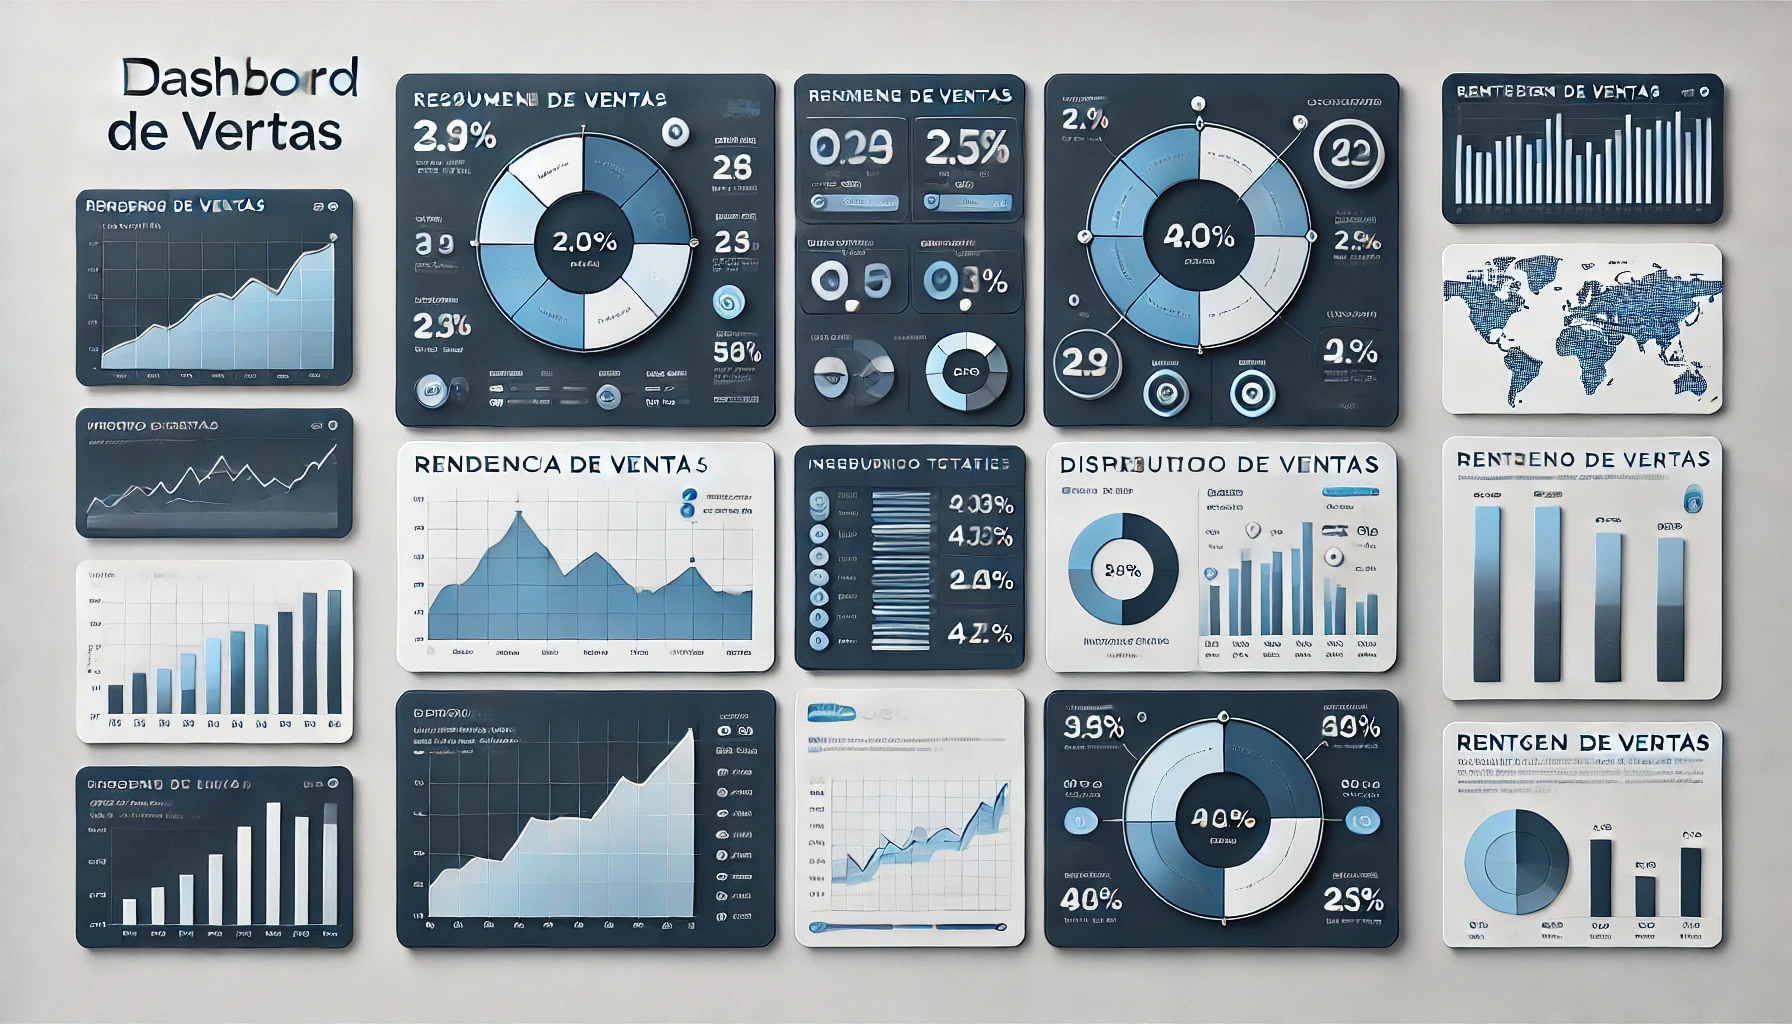

## Parte 3: Elaboración de un plan de trabajo para el desarrollo del Dashboard

La etapa final del proceso está abocada al desarrollo de un plan de trabajo sugerido para la creación del Dashboard en base a lo trabajado anteriormente (objetivos y prompt del dashboard) y las definiciones de recursos por parte del cliente (duración y personas involucradas).

El resultado será un plan de trabajo sugerido, detallando fases, duración, recursos y cronograma en semanas.

Se utilizará un modelo texto a texto, a través de la herramienta Gemini.

In [17]:
def generar_plan_trabajo(objetivos, prompt_dashboard):
    """Genera un plan de trabajo sugerido basado en los objetivos."""
    model = genai.GenerativeModel('gemini-1.5-flash-001')
    duracion= input("¿Cuántas semanas tiene pensado invertir en el proyecto? ")
    equipo= input("¿Qué personas participan en el proyecto? Indique los roles: ")
    prompt = f"A partir de los siguientes objetivos: {objetivos} y especificaciones {prompt_dashboard} genera un plan de trabajo detallado que incluya fases, duración, recursos necesarios y cronograma en semanas, con duración especificada en {duracion} (teniendo en cuenta que se trabajará en un máximo de 3 días por semana) y las personas involucradas serán: el Consultor de BI y el equipo del cliente según defina en {equipo}. Además la herramienta será Power BI"

    response = model.generate_content(prompt)
    plan_trabajo = response.text
    return plan_trabajo

*Ejemplo:*

*Duración: 4 semanas*

*Equipo: El Gerente de Ventas  y el Equipo de Ventas*

In [18]:
# Prueba de la generación de un plan de trabajo
plan_trabajo= generar_plan_trabajo(objetivos, prompt_dashboard)
print(plan_trabajo)

¿Cuántas semanas tiene pensado invertir en el proyecto? 4 semanas
¿Qué personas participan en el proyecto? Indique los roles: El Gerente de Ventas y el Equipo de Ventas
## Plan de Trabajo para el Mockup del Dashboard en Power BI

**Duración Total:** 4 semanas (12 días hábiles)

**Recursos:**

* **Herramienta:** Power BI
* **Personas:** 
    * Consultor de BI
    * Gerente de Ventas
    * Equipo de Ventas
* **Datos:** Tabla de datos proporcionada
* **Hardware:** Computadora con Power BI instalado

**Fases:**

**Semana 1 (3 días):**

* **Día 1:** Recopilación de Información y Análisis de Datos
    * **Tarea:** El Consultor de BI se reúne con el Gerente de Ventas para definir los KPIs y objetivos específicos del dashboard.
    * **Duración:** 4 horas
    * **Responsable:** Consultor de BI, Gerente de Ventas
* **Día 2:** Diseño del Mockup en Power BI
    * **Tarea:** El Consultor de BI diseña el mockup del dashboard utilizando Power BI, incluyendo la estructura de la información, los gráfi